In [1]:
import pickle
import numpy as np
import pandas as pd
import importlib as imp

from matplotlib import pyplot as plt
from IPython.core.display import display, HTML

import train
import build_features

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 1000)
display(HTML("<style>.container { width:98% !important; }</style>"))

/home/rob/Documents/GitHub/ObesityPY/src/train.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/rob/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rob/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rob/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rob/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
 

## Import the pickled data and define the age ranges

In [2]:
d1 = pickle.load(open('<path>/ObesityPY/python objects/patientdata_20170823.pkl', 'rb')) # first cohort data
d2 = pickle.load(open('<path>/Documents/patient_data_2_20180829.pkl', 'rb')) # second cohort data

d1mom = pickle.load(open('<path>/ObesityPY/python objects/patient_mother_data_20170724.pkl', 'rb')) # maternal data for first cohort (from time of birth)
d1mom_hist = pickle.load(open('<path>/ObesityPY/python objects/full_lutheran_mother_data.pkl', 'rb')) # maternal data for first cohort (any record, aside from birth, if at same hospital)

In [3]:
agex_low = 4.5 # lower bound on data to be used for y (in years)
agex_high = 5.5 # upper bound on data to be used for y (in years)
months_from = 0 # lower bound on data to be used for X (in months)
months_to = 24 # upper bound on data to be used for X (in months)

## Create a data array for the first cohort

In [4]:
x1_1, y1_1, y1_1label, feature_headers, mrns1_1 = build_features.call_build_function(
    d1, d1mom, d1mom_hist, {}, {}, 
    agex_low, agex_high, months_from, months_to, 
    False, prediction='multi'
)

Processing 52,945 patients: 52945it [02:55, 302.44it/s]   


In [5]:
x1_1.shape, x1_1[(x1_1.sum(axis=1) > 0)].shape

((52945, 19253), (11494, 19253))

## Create a data array for the second cohort

In [6]:
x1_2, y1_2, y1_2label, feature_headers, mrns1_2 = build_features.call_build_function(
    d2, {}, {}, {}, {}, 
    agex_low, agex_high, months_from, months_to, 
    False, prediction='multi'
)

Processing 58,018 patients: 1335it [00:01, 836.03it/s]/home/rob/Documents/GitHub/ObesityPY/src/zscore.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  Z = (((bmi / M)**L) - 1) / (S * L)
Processing 58,018 patients: 58018it [01:25, 682.06it/s]


In [7]:
x1_2.shape, x1_2[(x1_2.sum(axis=1) > 0)].shape

((58018, 19253), (8785, 19253))

## Create a dictionary id for the weight classifications

**Note:** severe obesity is a subset of 'obese'

In [8]:
label_ix = {'underweight':0,'normal':1,'overweight':2,'obese':3,'class I severe obesity':4,'class II severe obesity':5}

## Prepare the data for cohort 1 w/maternal requirement for inclusion

In [9]:
x2_1_mom, y2_1_mom, y2_1label_mom, mrns2_1_mom, ix_filter_1_mom, feature_headers2_1_mom, corr_headers_filtered_1_mom, corrs_matrix_filtered_1_mom, ix_corr_headers_1_mom = \
    train.prepare_data_for_analysis({}, {}, {}, {}, {},
        x1_1, y1_1, y1_1label[:,label_ix['obese']], feature_headers, mrns1_1,
        agex_low, agex_high, months_from, months_to,
        filterSTR=[],
        variablesubset=[],
        do_impute=False,
        do_normalize=False,
        min_occur=0,
        feature_info=False,
        delay_print=False,
        lasso_selection=False,
        use_maternal=True)

Using pre-prepared data

Original cohort size is: 52,945, number of features: 19,253
total number of people who have a valid BMI measured (10 > BMI < 40): 11,484
total number of people who have all filtered variables: 52,945
total number of people who have maternal data available: 3,451
intersection of the three is: 3,449


/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


filtered correlated features to: 18,910
corr matrix is filtered to size: (19253, 18910)
output is: average: 16.684, min: 10.470, max: 35.320
total patients: 3,449, positive: 642.00, negative: 2,807.00
normalizing output...
Using pre-prepared data
1698 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: []
total size: 3,449 x 19,253


## Prepare the data for cohort 1 w/o maternal requirement for inclusion

In [10]:
x2_1, y2_1, y2_1label, mrns2_1, ix_filter_1, feature_headers2_1, corr_headers_filtered_1, corrs_matrix_filtered_1, ix_corr_headers_1 = \
    train.prepare_data_for_analysis({}, {}, {}, {}, {},
        x1_1, y1_1, y1_1label[:,label_ix['obese']], feature_headers, mrns1_1,
        agex_low, agex_high, months_from, months_to,
        filterSTR=[],
        variablesubset=[],
        do_impute=False,
        do_normalize=False,
        min_occur=0,
        feature_info=False,
        delay_print=False,
        lasso_selection=False,
        use_maternal=False)

Using pre-prepared data

Original cohort size is: 52,945, number of features: 19,253
total number of people who have a valid BMI measured (10 > BMI < 40): 11,484
total number of people who have all filtered variables: 52,945
total number of people who have maternal data available: 3,451
11,484 patients selected (excludes maternal)...


/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


filtered correlated features to: 18,910
corr matrix is filtered to size: (19253, 18910)
output is: average: 16.770, min: 10.270, max: 39.150
total patients: 11,484, positive: 2,275.00, negative: 9,209.00
normalizing output...
Using pre-prepared data
1698 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: []
total size: 11,484 x 19,253


## Prepare the data for cohort 2 w/o maternal requirement for inclusion

In [11]:
x2_2, y2_2, y2_2label, mrns2_2, ix_filter_2, feature_headers2_2, corr_headers_filtered_2, corrs_matrix_filtered_2, ix_corr_headers_2 = \
    train.prepare_data_for_analysis({}, {}, {}, {}, {},
        x1_2, y1_2, y1_2label[:,label_ix['obese']], feature_headers, mrns1_2,
        agex_low, agex_high, months_from, months_to,
        filterSTR=[],
        variablesubset=[],
        do_impute=False,
        do_normalize=False,
        min_occur=0,
        feature_info=False,
        delay_print=False,
        lasso_selection=False,
        use_maternal=False)

Using pre-prepared data

Original cohort size is: 58,018, number of features: 19,253
total number of people who have a valid BMI measured (10 > BMI < 40): 8,671
total number of people who have all filtered variables: 58,018
total number of people who have maternal data available: 0
8,671 patients selected (excludes maternal)...


/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


filtered correlated features to: 18,910
corr matrix is filtered to size: (19253, 18910)
output is: average: 16.839, min: 10.030, max: 39.840
total patients: 8,671, positive: 1,905.00, negative: 6,766.00
normalizing output...
Using pre-prepared data
1698 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: []
total size: 8,671 x 19,253


## Compare the size of each data set and the gender parity

In [12]:
x1_1.shape[0], (x1_1[:, feature_headers.index('Gender:0 male')] > 0).sum(), (x1_1[:, feature_headers.index('Gender:1 female')] > 0).sum()

(52945, 5775, 5719)

In [13]:
x1_2.shape[0], (x1_2[:, feature_headers.index('Gender:0 male')] > 0).sum(), (x1_2[:, feature_headers.index('Gender:1 female')] > 0).sum()

(58018, 4688, 4114)

In [14]:
x2_1_mom.shape[0], (x2_1_mom[:, feature_headers2_1_mom.index('Gender:0 male')] > 0).sum(), (x2_1_mom[:, feature_headers2_1_mom.index('Gender:1 female')] > 0).sum()

(3449, 1751, 1698)

In [15]:
x2_1.shape[0], (x2_1[:, feature_headers2_1.index('Gender:0 male')] > 0).sum(), (x2_1[:, feature_headers2_1.index('Gender:1 female')] > 0).sum()

(11484, 5770, 5714)

In [16]:
x2_2.shape[0], (x2_2[:, feature_headers2_2.index('Gender:0 male')] > 0).sum(), (x2_2[:, feature_headers2_2.index('Gender:1 female')] > 0).sum()

(8671, 4613, 4058)

In [17]:
# this is for the whole data set for cohort 1
boys = 0
girls = 0
for pid in d1:
    if d1[pid]['gender']:
        boys += 1
    else:
        girls += 1
boys, girls, boys + girls

(26438, 26507, 52945)

In [18]:
# this is for the whole data set for cohort 2
boys = 0
girls = 0
for pid in d2:
    if d2[pid]['gender']:
        boys += 1
    else:
        girls += 1
boys, girls, boys + girls

(27607, 30411, 58018)

## Display some of the descriptive materials

In [21]:
print('Cohort 1 Weight Classification Breakdown\n')
cats = ['Weight Class', 'N', '%', '% Boys', '% Girls']
print('\033[1m' + ' | '.join((label.rjust(30) if i == 0 else label.rjust(6) for i, label in enumerate(cats))) + '\033[0m')

total = y1_1label[ix_filter_1, :4].sum()
for i, (label, num) in enumerate(zip(label_ix, y1_1label[ix_filter_1].sum(axis=0))):
    bpct = (ix_filter_1 & (y1_1label[:, i] == 1) & (x1_1[:, feature_headers.index('Gender:0 male')] == 1)).sum() / num * 100
    print(' | '.join((label.rjust(30), '{0:,.0f}'.format(num).rjust(6), '{0:2.1f}%'.format(100*num/total).rjust(6), '{0:2.1f}%'.format(bpct).rjust(6), '{0:2.1f}%'.format(100 - bpct).rjust(6))))
print(total)

Cohort 1 Weight Classification Breakdown

                  Weight Class |      N |      % | % Boys | % Girls
                   underweight |    257 |   2.2% |  52.1% |  47.9%
                        normal |  6,917 |  60.2% |  48.3% |  51.7%
                    overweight |  2,035 |  17.7% |  48.8% |  51.2%
                         obese |  2,275 |  19.8% |  57.4% |  42.6%
        class I severe obesity |    375 |   3.3% |  57.6% |  42.4%
       class II severe obesity |     95 |   0.8% |  61.1% |  38.9%
11484.0


In [22]:
print('Cohort 2 Weight Classification Breakdown\n')
cats = ['Weight Class', 'N', '%', '% Boys', '% Girls']
print('\033[1m' + ' | '.join((label.rjust(30) if i == 0 else label.rjust(6) for i, label in enumerate(cats))) + '\033[0m')

total = y1_2label[ix_filter_2, :4].sum()
for i, (label, num) in enumerate(zip(label_ix, y1_2label[ix_filter_2].sum(axis=0))):
    bpct = (ix_filter_2 & (y1_2label[:, i] == 1) & (x1_2[:, feature_headers.index('Gender:0 male')] == 1)).sum() / num * 100
    print(' | '.join((label.rjust(30), '{0:,.0f}'.format(num).rjust(6), '{0:2.1f}%'.format(100*num/total).rjust(6), '{0:2.1f}%'.format(bpct).rjust(6), '{0:2.1f}%'.format(100 - bpct).rjust(6))))
print(total)

Cohort 2 Weight Classification Breakdown

                  Weight Class |      N |      % | % Boys | % Girls
                   underweight |    287 |   3.3% |  50.5% |  49.5%
                        normal |  4,994 |  57.6% |  53.4% |  46.6%
                    overweight |  1,485 |  17.1% |  50.1% |  49.9%
                         obese |  1,905 |  22.0% |  55.6% |  44.4%
        class I severe obesity |    309 |   3.6% |  54.0% |  46.0%
       class II severe obesity |    118 |   1.4% |  62.7% |  37.3%
8671.0


In [23]:
print('Cohort 1 Racial Breakdown\n')
cats = ['Race Category', 'N', '%', '% Boys', '% Girls' '% Obese']
print('\033[1m' + ' | '.join((label.rjust(45) if i == 0 else label.rjust(7) for i, label in enumerate(cats))) + '\033[0m')

race_cats = [(i,f) for i, f in enumerate(feature_headers) if f.startswith('Race')]
boys_ix = feature_headers.index('Gender:0 male')
total = ix_filter_1.sum()
for i,f in race_cats:
    num = (ix_filter_1 & (x1_1[:, i] == 1)).sum()
    opct = (ix_filter_1& (x1_1[:, i] == 1) & (y1_1label[:, label_ix['obese']] == 1)).sum() / num * 100 if num > 0 else 0
    numb = (ix_filter_1 & (x1_1[:, i] == 1) & (x1_1[:, boys_ix] == 1)).sum()
    bpct = numb / num * 100 if num > 0 else 0
    print(' | '.join((f.rjust(50), '{:,.0f}'.format(num).rjust(7), '{:,.1f}%'.format(num/total*100).rjust(7), '{:,.1f}%'.format(bpct).rjust(7), '{:,.1f}%'.format(100-bpct).rjust(7), '{:,.1f}%'.format(opct).rjust(7))))

Cohort 1 Racial Breakdown

                                Race Category |       N |       % |  % Boys | % Girls% Obese
                                  Race:MULTIRACIAL |   6,585 |   57.3% |   49.8% |   50.2% |   20.6%
                                        Race:ASIAN |   1,218 |   10.6% |   53.5% |   46.5% |   14.0%
                                  Race:SOUTH ASIAN |       0 |    0.0% |    0.0% |  100.0% |    0.0%
                       Race:AFRICAN AMERICAN/BLACK |   1,316 |   11.5% |   50.4% |   49.6% |   22.1%
                                        Race:OTHER |     915 |    8.0% |   50.6% |   49.4% |   22.8%
                              Race:CAUCASIAN/WHITE |   1,188 |   10.3% |   48.9% |   51.1% |   17.2%
            Race:AMERICAN INDIAN OR ALASKAN NATIVE |      85 |    0.7% |   49.4% |   50.6% |   12.9%
            Race:NATIVE HAWAIIAN/PACIFIC ISLANDERS |      18 |    0.2% |   55.6% |   44.4% |   11.1%


In [25]:
print('Cohort 2 Racial Breakdown\n')
cats = ['Race Category', 'N', '%', '% Boys', '% Girls' '% Obese']
print('\033[1m' + ' | '.join((label.rjust(45) if i == 0 else label.rjust(7) for i, label in enumerate(cats))) + '\033[0m')

race_cats = [(i,f) for i, f in enumerate(feature_headers) if f.startswith('Race')]
boys_ix = feature_headers.index('Gender:0 male')
total = ix_filter_2.sum()
for i,f in race_cats:
    num = (ix_filter_2 & (x1_2[:, i] == 1)).sum()
    opct = (ix_filter_2& (x1_2[:, i] == 1) & (y1_2label[:, label_ix['obese']] == 1)).sum() / num * 100 if num > 0 else 0
    numb = (ix_filter_2 & (x1_2[:, i] == 1) & (x1_2[:, boys_ix] == 1)).sum()
    bpct = numb / num * 100 if num > 0 else 0
    print(' | '.join((f.rjust(45), '{:,.0f}'.format(num).rjust(7), '{:,.1f}%'.format(num/total*100).rjust(7), '{:,.1f}%'.format(bpct).rjust(7), '{:,.1f}%'.format(100-bpct).rjust(7), '{:,.1f}%'.format(opct).rjust(7))))

Cohort 2 Racial Breakdown

                                Race Category |       N |       % |  % Boys | % Girls% Obese
                             Race:MULTIRACIAL |       0 |    0.0% |    0.0% |  100.0% |    0.0%
                                   Race:ASIAN |       0 |    0.0% |    0.0% |  100.0% |    0.0%
                             Race:SOUTH ASIAN |     642 |    7.4% |   56.7% |   43.3% |   14.2%
                  Race:AFRICAN AMERICAN/BLACK |   1,048 |   12.1% |   54.5% |   45.5% |   17.9%
                                   Race:OTHER |   3,394 |   39.1% |   52.1% |   47.9% |   23.5%
                         Race:CAUCASIAN/WHITE |     333 |    3.8% |   55.3% |   44.7% |   15.6%
       Race:AMERICAN INDIAN OR ALASKAN NATIVE |      43 |    0.5% |   51.2% |   48.8% |   27.9%
       Race:NATIVE HAWAIIAN/PACIFIC ISLANDERS |      69 |    0.8% |   62.3% |   37.7% |   14.5%


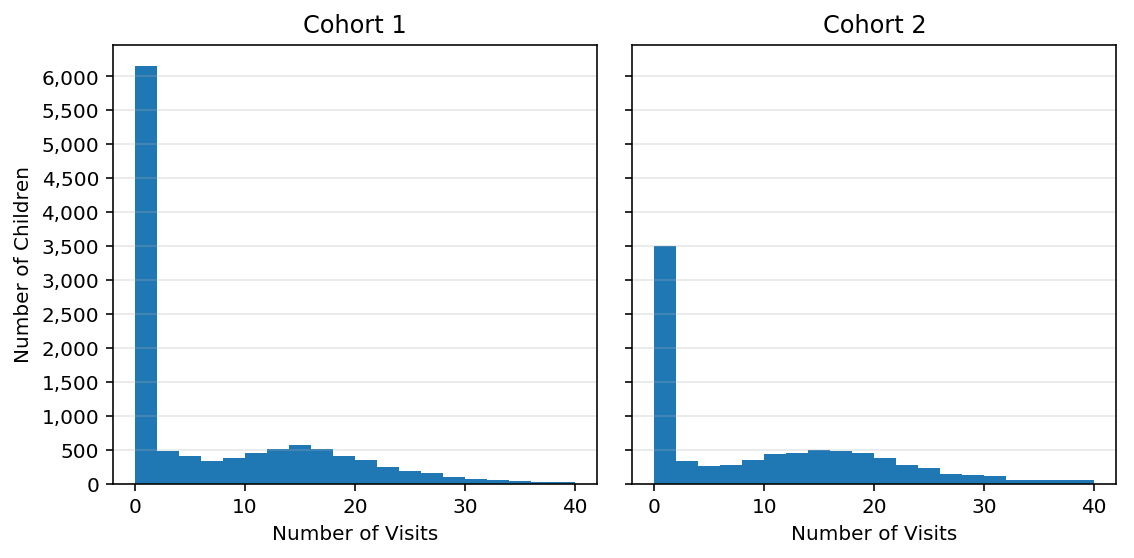

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,4))

ax1.grid(axis='y', alpha=0.3)
ax1.hist(x2_1[:, feature_headers2_1.index('Number of Visits')], bins=20, range=(0,40))
ax1.set_title('Cohort 1')
ax1.set_ylabel('Number of Children')
ax1.set_xlabel('Number of Visits')
yrange = np.linspace(0,6000,13,dtype=int)
ax1.set_yticks(yrange)
ax1.set_yticklabels(['{:,d}'.format(el) for el in yrange])

ax2.grid(axis='y', alpha=0.3)
ax2.hist(x2_2[:, feature_headers2_2.index('Number of Visits')], bins=20, range=(0,40))
ax2.set_title('Cohort 2')
ax2.set_xlabel('Number of Visits')

plt.tight_layout()
# plt.savefig('<path>/Documents/n_visits_comparison.png', dpi=120, bbox_to_inches=True)
plt.show()